In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
sns.set_style('whitegrid')

In [ ]:
pests=pd.read_csv('/content/drive/MyDrive/crop yield/pesticides.csv')
rainfall=pd.read_csv('/content/drive/MyDrive/crop yield/rainfall.csv')
temp=pd.read_csv('/content/drive/MyDrive/crop yield/temp.csv')
cyield= pd.read_csv('/content/drive/MyDrive/crop yield/yield.csv')
yield_df=pd.read_csv('/content/drive/MyDrive/crop yield/yield_df.csv')

## 1- Crop Yield DataFrame

In [ ]:
cyield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
cyield.shape

(56717, 12)

In [ ]:
cyield=cyield.rename(index=str,columns={'Value':'hg/ha_yield'})

In [ ]:
cyield.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'hg/ha_yield'],
      dtype='object')

In [ ]:
cyield = cyield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
cyield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [ ]:
cyield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
cyield.isnull().sum()

Area           0
Item           0
Year           0
hg/ha_yield    0
dtype: int64

 ## **2- RainFall Data**

In [ ]:
rainfall.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [ ]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [ ]:
rainfall.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [ ]:
rainfall=rainfall.rename(index=str,columns={' Area':'Area'})

In [ ]:
rainfall['average_rain_fall_mm_per_year']=pd.to_numeric(rainfall['average_rain_fall_mm_per_year'],errors='coerce')

In [ ]:
rainfall.isnull().sum()

Area                               0
Year                               0
average_rain_fall_mm_per_year    780
dtype: int64

In [ ]:
rainfall.dropna(inplace=True)

### Merge

In [ ]:
yield_df=pd.merge(cyield,rainfall,on=['Year','Area'])

In [ ]:
yield_df.shape

(25385, 5)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [ ]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


## 3- Pesticides dataframe

In [ ]:
pests.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
pests = pests.rename(index=str,columns={"Value": "pesticides_tonnes"})
pests = pests.drop(['Element','Domain','Unit','Item'], axis=1)
pests.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
pests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [ ]:
pests.isnull().sum()

Area                 0
Year                 0
pesticides_tonnes    0
dtype: int64

### Merge

In [ ]:
yield_df = pd.merge(yield_df, pests, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


## 4- Temperature dataframe

In [ ]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
temp=temp.rename(index=str,columns={'year':'Year','country':'Area'})

### Merge

In [ ]:
yield_df = pd.merge(yield_df, temp, on=['Year','Area'])
yield_df.shape

(28242, 7)

In [ ]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

# EDA

In [ ]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [ ]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


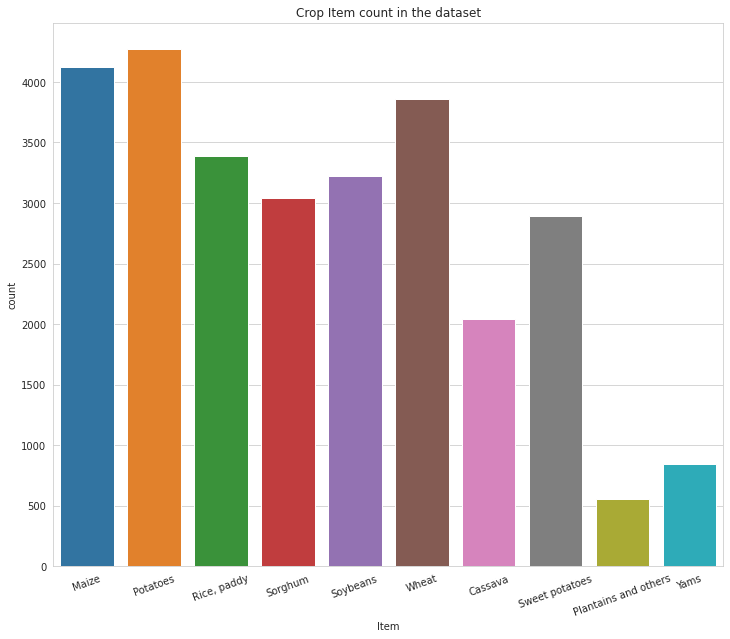

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(yield_df['Item'])
plt.title("Crop Item count in the dataset")
plt.xticks(rotation=20);

In [ ]:
yield_df.Area.nunique()

101

# Egypt crops EDA

In [ ]:
eg=yield_df[yield_df['Area']=='Egypt']

In [ ]:
eg.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
8079,Egypt,Maize,1990,57803,51.0,13214.0,20.73
8080,Egypt,Maize,1990,57803,51.0,13214.0,21.60
8081,Egypt,Potatoes,1990,205592,51.0,13214.0,20.73
8082,Egypt,Potatoes,1990,205592,51.0,13214.0,21.60
8083,Egypt,"Rice, paddy",1990,72663,51.0,13214.0,20.73


In [ ]:
eg.shape

(322, 7)

In [ ]:
eg.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,322.000000,322.000000,322.0,322.000000,322.000000
mean,2001.434783,114375.304348,51.0,7594.521739,21.637609
std,7.074840,89180.123620,0.0,3403.570473,0.715374
min,1990.000000,24344.000000,51.0,4175.000000,20.090000
25%,1995.000000,54221.000000,51.0,4715.000000,21.110000
50%,2001.000000,72700.000000,51.0,5471.000000,21.555000
75%,2008.000000,205592.000000,51.0,9781.000000,22.080000
max,2013.000000,336781.000000,51.0,13991.000000,23.720000


In [ ]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Area
India                 327420324
Brazil                167550306
Mexico                130788528
Japan                 124470912
Australia             109111062
Pakistan               73897434
Indonesia              69193506
United Kingdom         55419990
Turkey                 52263950
Spain                  46773540
South Africa           41333132
Germany                38780463
Egypt                  36828848
Canada                 34706922
Argentina              32864032
Italy                  32280700
Colombia               26927138
Dominican Republic     25312166
Morocco                22173010
Ecuador                21315591
Name: hg/ha_yield, dtype: int64

### **Egypt** is ranked 13th among top 20 country in producing crops in the world

In [ ]:
yield_df.groupby(['Area','Item'],sort=True)['hg/ha_yield'].sum().nlargest(30)

Area            Item          
India           Cassava           142810624
                Potatoes           92122514
Brazil          Potatoes           49602168
United Kingdom  Potatoes           46705145
Australia       Potatoes           45670386
India           Sweet potatoes     44439538
Japan           Potatoes           42918726
Mexico          Potatoes           42053880
                Sweet potatoes     35808592
Australia       Sweet potatoes     35550294
Brazil          Cassava            33671231
Pakistan        Potatoes           32969754
Japan           Sweet potatoes     32794236
Turkey          Potatoes           30530955
Japan           Yams               29165394
Brazil          Sweet potatoes     28266502
South Africa    Potatoes           27341980
Germany         Potatoes           26672181
Brazil          Yams               23472053
Pakistan        Sweet potatoes     21687615
Mexico          Cassava            21610424
Indonesia       Potatoes           21560562
 

### **Egypt** is one of the highest countries in producing "Sweet potatoes" and also Sweet potatoes is the crop that Egypt produces most

In [ ]:
yield_df.groupby(['Area','pesticides_tonnes'],sort=True)['hg/ha_yield'].sum().nsmallest(30)

Area       pesticides_tonnes
Botswana   19.00                 30089
Namibia    48.00                 58859
           42.00                 61173
           39.00                 74391
Eritrea    24.96                 82431
           30.92                 89548
Bahrain    12.50                100000
           12.75                100000
           8.65                 103333
Eritrea    22.28                104386
Bahrain    9.20                 110000
Eritrea    19.61                111837
Estonia    195.00               114813
Bahrain    12.16                125000
Lithuania  1197.00              126137
Armenia    69.85                127206
Lithuania  713.00               128416
Estonia    351.00               128499
Algeria    1255.02              128963
Bahrain    12.12                130000
Latvia     358.00               136936
Lithuania  1380.00              138037
Latvia     367.40               138750
Albania    201.00               139924
Estonia    187.00               143

In [ ]:
yield_df.groupby(['Area','pesticides_tonnes'],sort=True)['hg/ha_yield'].sum().nlargest(30)

Area          pesticides_tonnes
Indonesia     1597.00              61425606
Japan         79821.18             58086216
Mexico        34468.93             55925992
South Africa  26857.00             26184764
India         52980.00             17992942
              55540.00             17522978
              45620.00             17389834
              40093.69             16461236
              28707.01             15909256
              14485.33             15897596
              37423.00             15188888
              35342.00             14916066
              27422.77             14903460
Jamaica       909.71               14205137
India         44957.52             14153062
              35113.00             14065018
              42482.56             14045460
              43720.04             13955546
              46195.00             13077592
              52279.00             12978812
              61257.00             12826044
              61357.00             12760308


### **Egypt** uses pesticies with average quanities as it's not in the top 30 or bottom 30 countries in using pesticides

In [ ]:
yield_df.groupby(['Area','average_rain_fall_mm_per_year'],sort=True)['hg/ha_yield'].sum().nlargest(30)

Area                average_rain_fall_mm_per_year
India               1083.0                           327420324
Brazil              1761.0                           167550306
Mexico              758.0                            130788528
Japan               1668.0                           124470912
Australia           534.0                            109111062
Pakistan            494.0                             73897434
Indonesia           2702.0                            69193506
United Kingdom      1220.0                            55419990
Turkey              593.0                             52263950
Spain               636.0                             46773540
South Africa        495.0                             41333132
Germany             700.0                             38780463
Egypt               51.0                              36828848
Canada              537.0                             34706922
Argentina           591.0                             32864032
Italy

### Although avg of rainfall in egypt is 51 mm/year it's ranked 13th in producing crops which is an important observation.

## plot year vs. crop

## 1- wheat

In [ ]:
tmp=eg[eg['Item']=='Wheat']

In [ ]:
tmp.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
8091,Egypt,Wheat,1990,51967,51.0,13214.0,20.73
8092,Egypt,Wheat,1990,51967,51.0,13214.0,21.60
8105,Egypt,Wheat,1991,48163,51.0,8255.0,20.64
8106,Egypt,Wheat,1991,48163,51.0,8255.0,21.65
8119,Egypt,Wheat,1992,52546,51.0,6156.0,20.09


In [ ]:
np.min(tmp['Year'])

1990

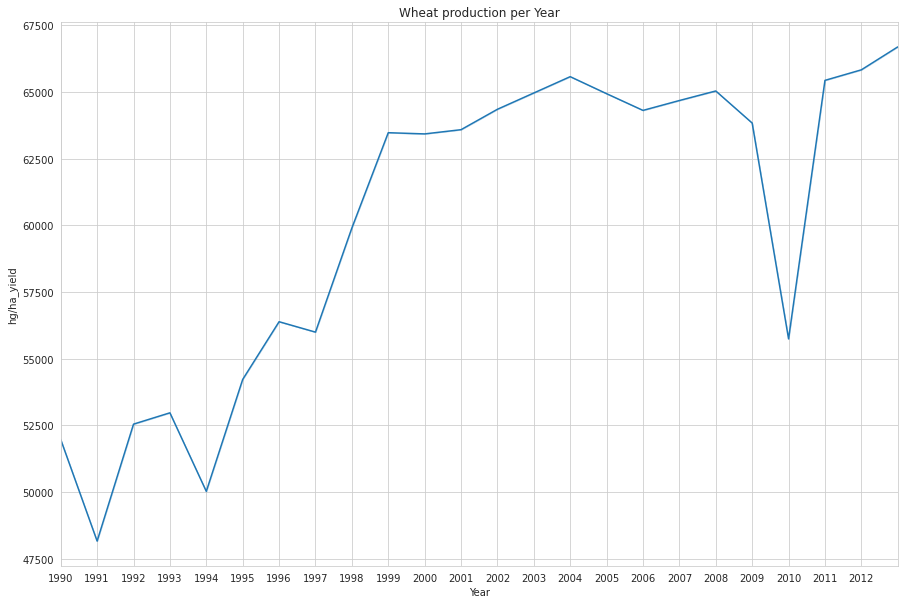

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=tmp['Year'],y=tmp['hg/ha_yield'])
plt.xlim(1990,2013)
plt.title('Wheat production per Year')
plt.xticks(range(1990,2013));

### highest year in wheat production is 2013 and least is 1991

## 2- Rice

In [ ]:
tmp=eg[eg['Item']=='Rice, paddy']

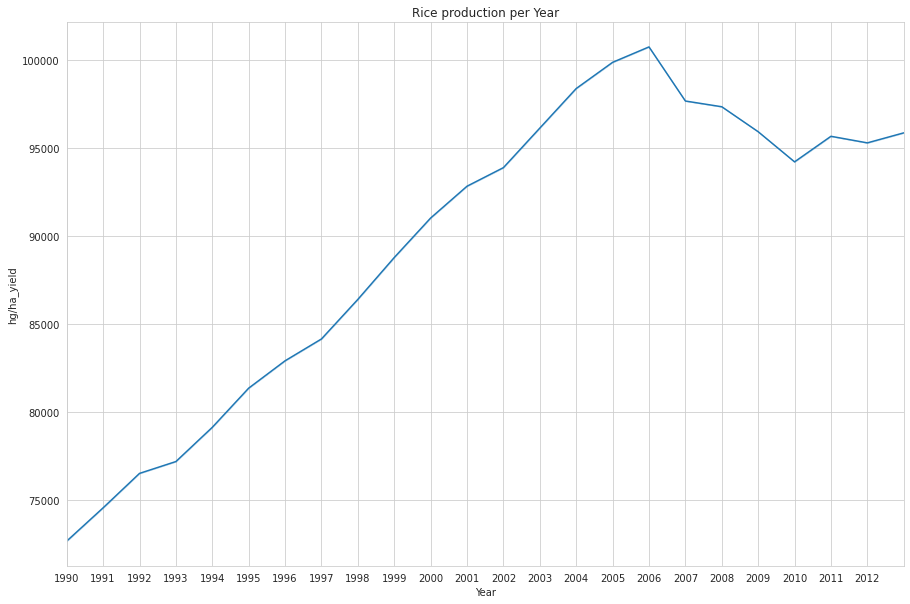

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=tmp['Year'],y=tmp['hg/ha_yield'])
plt.xlim(1990,2013)
plt.title('Rice production per Year')
plt.xticks(range(1990,2013));

### highest year in rice production is 2006 and least is 1990

## least year in egypt overall crop production is 2006 and highest year is 2013

3- Maize

In [ ]:
tmp=eg[eg['Item']=='Maize']

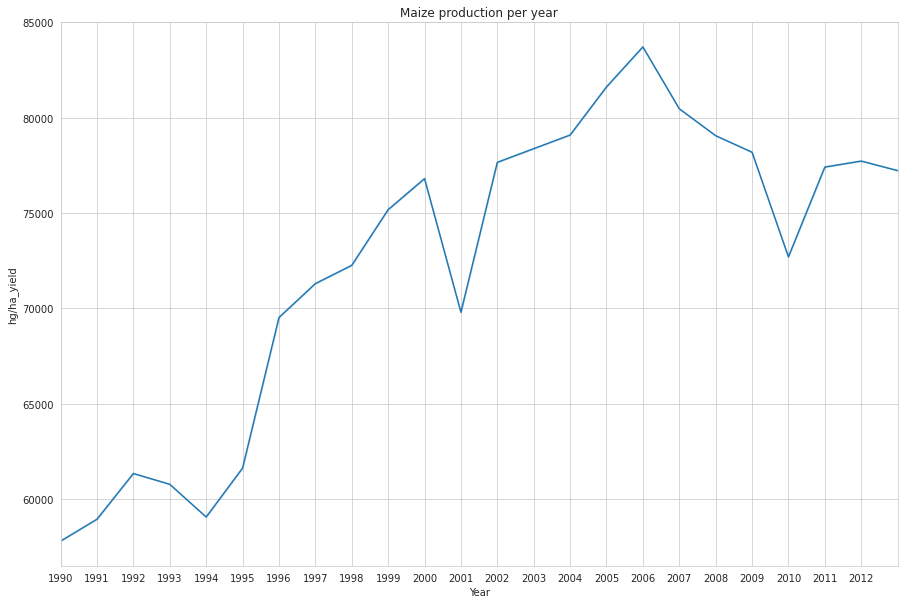

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=tmp['Year'],y=tmp['hg/ha_yield'])
plt.xlim(1990,2013)
plt.title('Maize production per year')
plt.xticks(range(1990,2013));

### highest year in maize production is 2006 and lowest is 1990

In [ ]:
tmp=eg[eg['Item']=='Potatoes']

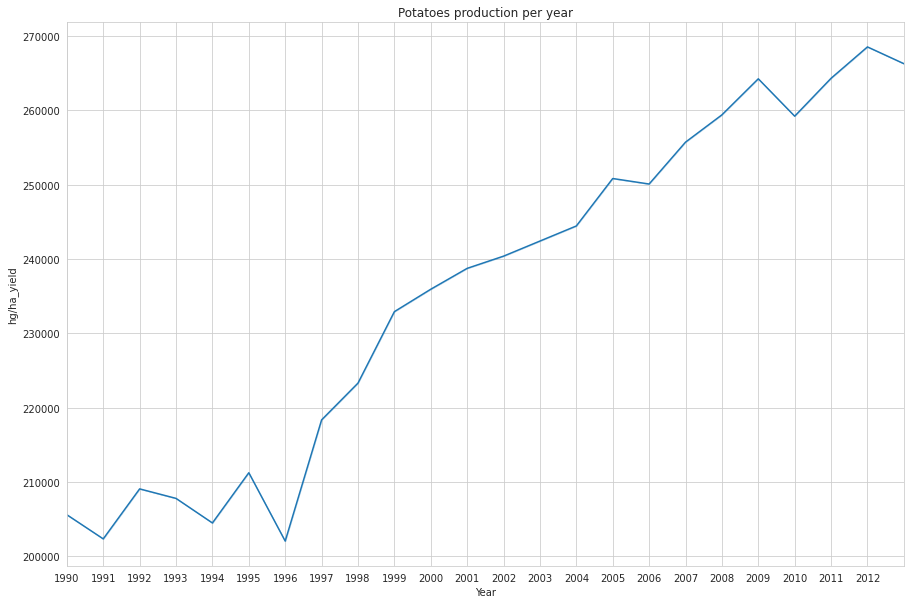

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=tmp['Year'],y=tmp['hg/ha_yield'])
plt.xlim(1990,2013)
plt.title('Potatoes production per year')
plt.xticks(range(1990,2013));

### highest year in potatoes production is 2012 and lowest is 1996

## sweet potatoes

In [ ]:
tmp=eg[eg['Item']=='Sweet potatoes']

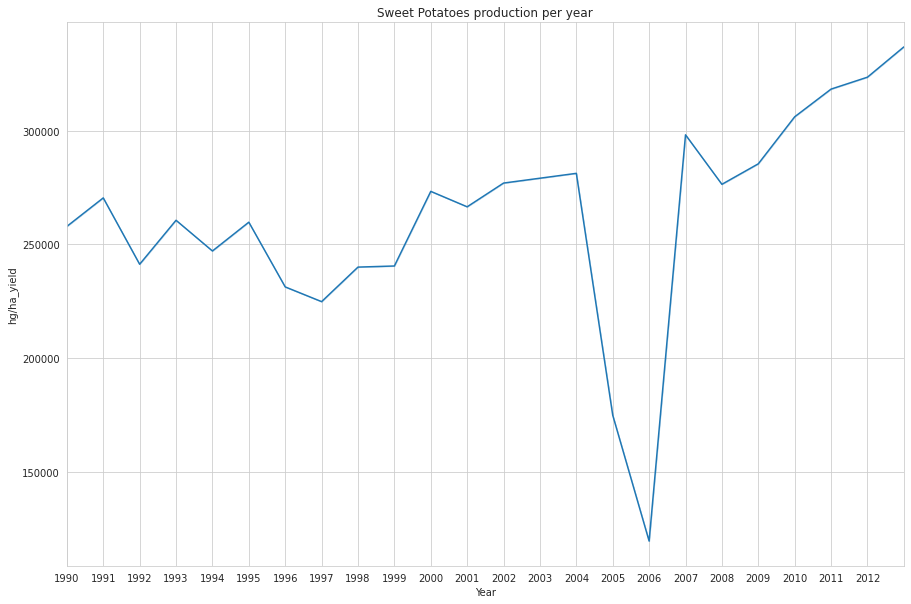

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=tmp['Year'],y=tmp['hg/ha_yield'])
plt.xlim(1990,2013)
plt.title('Sweet Potatoes production per year')
plt.xticks(range(1990,2013));

## Lowest year in producing sweet potatoes is 2006 and highest is 2013

## Average crop production

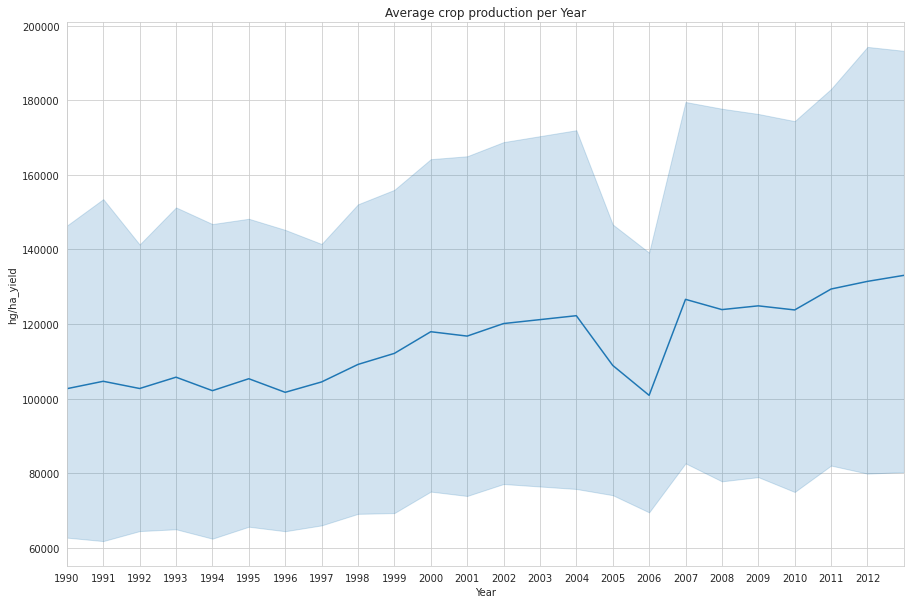

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=eg['Year'],y=eg['hg/ha_yield'])
plt.xlim(1990,2013)
plt.title('Average crop production per Year')
plt.xticks(range(1990,2013));

### Now it's clear that egypt's production was low in 2006 as sweet potatoes production is low in this year and egypt's highest produces crop is sweet potatoes

## Relationships

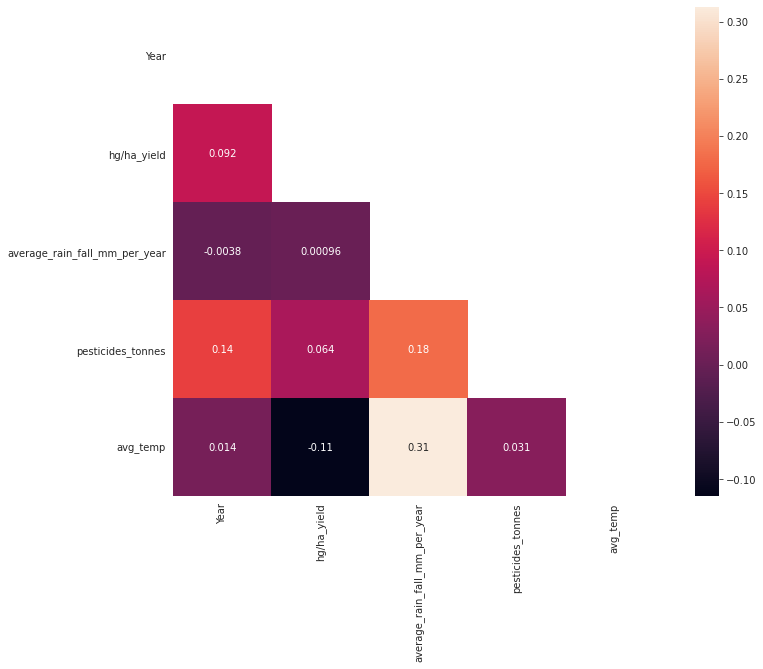

In [ ]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask,annot=True);

### Heatmap is not giving any insights >> no storng correlation between attributes "support use of linear regression"

In [ ]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## Data Processing and preparation for ML

In [ ]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
X=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
y=yield_df['hg/ha_yield']
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
yield_df_onehot.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

## Data Scaling

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X) 

## Split into Train/Test: 70% train and 30% test

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# This function trains different models and evaluates them with r2 score to determine best performing model
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

## ML modeling and choosing best model

In [ ]:
models = [
    GradientBoostingRegressor(n_estimators=1000),
    RandomForestRegressor(n_estimators=1000),
    svm.SVR(C=100,degree=5),
    DecisionTreeRegressor(),
    XGBRegressor(n_estimators=1500)
]

In [ ]:
model_train=list(map(compare_models,models)) 

[21:34:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.9551995733998585]
['RandomForestRegressor', 0.9871446112202537]
['SVR', 0.35491737612347096]
['DecisionTreeRegressor', 0.9794590234491022]
['XGBRegressor', 0.9644334215689696]


## Reverse One hot encoding to determing each crop r2 score

In [ ]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [ ]:
test_df=test_df.drop('Year',axis=1)

In [ ]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,...,Country_Niger,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [ ]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy"
1,0.458451,0.000413,0.627257,Madagascar,Wheat
2,0.183443,0.106159,0.518228,Spain,Sorghum
3,1.000000,0.224154,0.890971,Colombia,Potatoes
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes


## Train Random Forest model and evaluate on each crop

In [ ]:
clf=RandomForestRegressor(n_estimators=1000)
model=clf.fit(train_data,train_labels)
test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.983127
Maize                   0.966728
Plantains and others    0.929442
Potatoes                0.967499
Rice, paddy             0.967310
Sorghum                 0.927019
Soybeans                0.936202
Sweet potatoes          0.954521
Wheat                   0.968542
Yams                    0.980677
dtype: float64

# Plot actual values against the predicted ones 


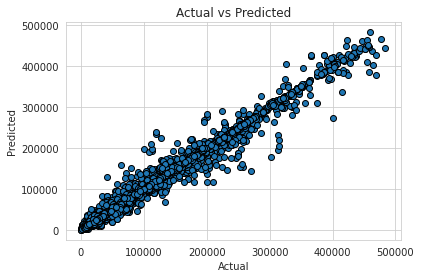

In [ ]:
fig, ax = plt.subplots() 
ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [ ]:
filename = 'cropyield_model.pkl'
pickle.dump(model, open(filename, 'wb'))